In [73]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [74]:
DATADIR = "toraxImages"

CATEGORIES= ["NORMAL","PNEUMONIA"]
originalTrain=[]
grayTrain=[]
training_data=[]
label_data=[]


for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    # print(os.listdir(path))
    for img in os.listdir(path):
        originalImage=cv2.imread(os.path.join(path,img))
        grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
        img_array=blackAndWhiteImage
        new_array = cv2.resize(img_array, (100, 100))
        training_data.append([new_array])
        gray_new_array = cv2.resize(grayImage, (100, 100))
        grayTrain.append([gray_new_array])
        original_new_array = cv2.resize(originalImage, (100, 100))
        originalTrain.append([original_new_array])
        label_data.append([class_num])

In [76]:
print(grayTrain[0])

[array([[22, 18, 24, ..., 94, 93, 93],
       [19, 20, 14, ..., 97, 93, 90],
       [20, 19, 15, ..., 94, 91, 88],
       ...,
       [29, 29, 29, ..., 21, 23, 24],
       [30, 27, 26, ..., 43, 46, 45],
       [38, 36, 37, ..., 86, 89, 91]], dtype=uint8)]


In [77]:
X_train=[]
y_train=[]

In [78]:
for image in grayTrain:
    X_train.append(image)
#     y_train.append(category)

In [79]:
X_train= np.array(X_train).reshape(-1,100,100)
y_train = np.array(label_data)
print(X_train[0].shape)
print(y_train.shape)

(100, 100)
(5216, 1)


In [7]:
# import random
# random.shuffle(X_train)
# random.shuffle(grayTrain)
# random.shuffle(originalTrain)

[[22 18 24 ... 94 93 93]
 [19 20 14 ... 97 93 90]
 [20 19 15 ... 94 91 88]
 ...
 [29 29 29 ... 21 23 24]
 [30 27 26 ... 43 46 45]
 [38 36 37 ... 86 89 91]]
NORMAL


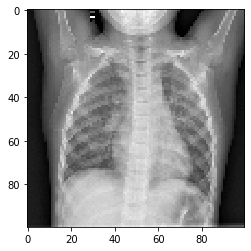

In [80]:
index=0
for sample in X_train:
    plt.imshow(sample,cmap="gray")
    print(sample)
    cat=int(y_train[index])
#     print(cat)
    print(CATEGORIES[cat])
    index=index+1
    break
#     print(sample)
#     print(CATEGORIES[y_train[1]])
#     print(sample.shape)

In [81]:
len(y_train)

5216

In [10]:
# A PARTIR DE AQUI ES DOCUMENTACION TENSORFLOW

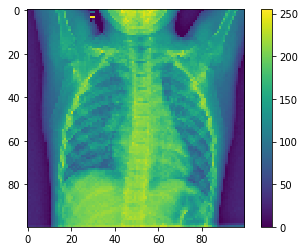

In [82]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [84]:
BW=X_train
BW=BW/255.0

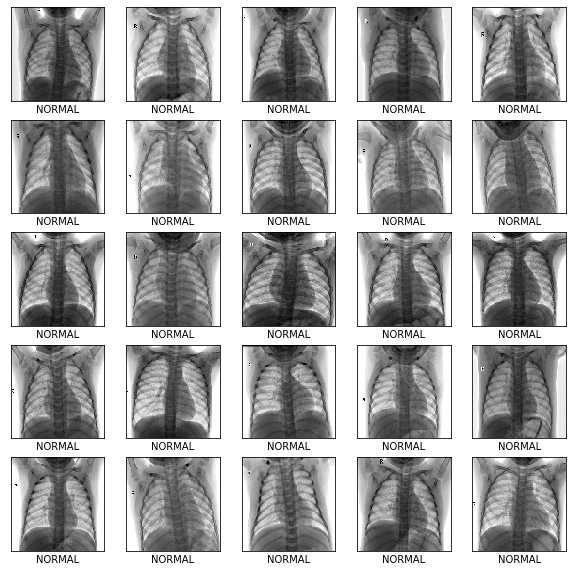

In [111]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    cat=int(y_train[i])
    plt.xlabel(CATEGORIES[cat])
plt.show()

In [14]:
##MODELO

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [87]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [201]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
163/163 [==============================] - 1s 9ms/step - loss: 0.0797 - accuracy: 0.9703
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0876 - accuracy: 0.9688
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0777 - accuracy: 0.9730
Epoch 4/10
163/163 [==============================] - 1s 9ms/step - loss: 0.0966 - accuracy: 0.9641
Epoch 5/10
163/163 [==============================] - 1s 9ms/step - loss: 0.0903 - accuracy: 0.9707
Epoch 6/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0910 - accuracy: 0.9678
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0949 - accuracy: 0.9649
Epoch 8/10
163/163 [==============================] - 1s 9ms/step - loss: 0.0953 - accuracy: 0.9663
Epoch 9/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0685 - accuracy: 0.9778
Epoch 10/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0659 - accuracy: 0.9780

In [202]:
test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

163/163 - 1s - loss: 0.0425 - accuracy: 0.9872


In [203]:
Test_DATADIR = "testTorax"

Test_CATEGORIES= ["NORMAL","PNEUMONIA"]
originalTest=[]
grayTest=[]
test_data=[]
label_test=[]

for category in CATEGORIES:
    path=os.path.join(Test_DATADIR, category)
    class_num=Test_CATEGORIES.index(category)
    # print(os.listdir(path))
    for img in os.listdir(path):
        originalImageTest=cv2.imread(os.path.join(path,img))
        grayImageTest = cv2.cvtColor(originalImageTest, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImageTest, 127, 255, cv2.THRESH_BINARY)
        img_arrayTest=blackAndWhiteImage
        new_arrayTest = cv2.resize(img_arrayTest, (100, 100))
        test_data.append([new_arrayTest])
        gray_new_arrayTest = cv2.resize(grayImageTest, (100, 100))
        grayTest.append([gray_new_arrayTest])
        original_new_arrayTest = cv2.resize(originalImageTest, (100, 100))
        originalTest.append([original_new_arrayTest])
        label_test.append([class_num])

In [204]:
X_test=[]
y_test=[]

for image in grayTest:
    X_test.append(image)
#     y_train.append(category)

X_test= np.array(X_test).reshape(-1,100,100)
y_test = np.array(label_test)
print(X_test[0].shape)
print(y_test.shape)

(100, 100)
(624, 1)


In [205]:
prediction=model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 3ms/step - loss: 1.4935 - accuracy: 0.7612


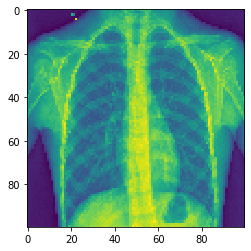

In [206]:
plt.figure()
plt.imshow(X_test[0])
# plt.colorbar()
plt.grid(False)
plt.show()

In [207]:
X_test[1].shape
X_test.shape
# X_OneTest=[X_test[0]]
X_One=[]
X_One.append(X_test[100])
X_One= np.array(X_One).reshape(-1,100,100)


In [210]:
prediction2 = model.predict(X_test)
print(prediction2[3])

[3.6880665e-04 9.9963117e-01]


In [197]:
TestImage=cv2.imread(https://media.sciencephoto.com/image/c0096770/800wm/C0096770-Healthy_lungs,_X-ray.jpg)
print(TestImage)

SyntaxError: invalid syntax (<ipython-input-197-58fa3d053211>, line 1)